<a href="https://colab.research.google.com/github/kjmobile/lb/blob/main/1_LM_Simple_Linear_to_Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Linear to Polynomial Regression

## Data Prep

In [2]:
import pandas as pd
import numpy as np

In [5]:
fish_df=pd.read_csv('https://raw.githubusercontent.com/kjmobile/data/refs/heads/main/ml/fish_l.csv')
fish_df.head()

,Species,Weight,Length,Height,Width
0,Bream,242.0,25.4,11.5200,4.0200
1,Bream,290.0,26.3,12.4800,4.3056
2,Bream,340.0,26.5,12.3778,4.6961
3,Bream,363.0,29.0,12.7300,4.4555
4,Bream,430.0,29.0,12.4440,5.1340


In [7]:
# Convert the DataFrame to a NumPy array:
# Select only length and weight columns for conducting a simple linear regression

fish = fish_df[["Length","Weight"]].to_numpy()
print(fish)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [  14.1   40. ]
 [  18.2   69. ]
 [  18.8   78. ]
 [  19.8   87. ]
 [  20.   120. ]
 [  20.5    0. ]
 [  20.8  110. ]
 [  21.   120. ]
 [  22.   150. ]
 [  22.   145. ]
 [  22.5  160. ]
 [  22.5  140. ]
 [  22.5  160. ]
 [  24.   169. ]
 [  23.4  161. ]
 [  23.5  200. ]
 [  25.2  180. ]
 [  26.   290. ]
 [  27.   272. ]
 [  31.7  390. ]
 [  26.   270. ]
 [  26.5  270. ]
 [  28.   306. ]
 [  31.   540.

In [8]:
#train-test split: Use the weight column as target,y  length as X (X should be reshaped into 2D arrays)
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(fish[:,0].reshape(-1,1), fish[:,1], test_size=.25, random_state=0)

  WHY fish[:,0].reshape(-1,1) instead of reshape(-1,)?:  
  Scikit-learn's expectation: Most machine learning algorithms in scikit-learn expect the input features (X) to be in a 2-dimensional format, even if there's only one feature (like fish length in this case).

In [9]:
fish.shape

(159, 2)

In [10]:
train_X.shape

(119, 1)

In [11]:
test_X.shape

(40, 1)

In [12]:
train_y.shape

(119,)

## Fit model - simple linear regression

In [13]:
from sklearn import linear_model
m1 = linear_model.LinearRegression()
m1.fit(train_X, train_y)

LinearRegression()

In [14]:
# beta coefficient for weight
m1.coef_

array([28.83948956])

In [15]:
# intercept
m1.intercept_

-422.74595014472595

### Evalute Model Performance: m1

In [16]:
# Evaluate R^2 of the the model on the train vs. test set
print("Train set score:",  m1.score(train_X, train_y))
print("Test set score:", m1.score(test_X, test_y))

Train set score: 0.8221200225566794
Test set score: 0.8611608714284771


In [17]:
# Get coefficients and intercept
coef = m1.coef_[0]
intercept = m1.intercept_

# Print model equation
print(f"Model Equation for M1: Weight = {coef:.2f} × Length + {intercept:.2f}")

Model Equation for M1: Weight = 28.84 × Length + -422.75


In [18]:
m1.predict([[60]]) # how many pounds if the fish is 60 inch fish?

array([1307.62342345])

In [19]:
m1.predict([[60],[50]])

array([1307.62342345, 1019.22852785])

### Plot Test set results: Simple Linear


Text(0, 0.5, 'weight')

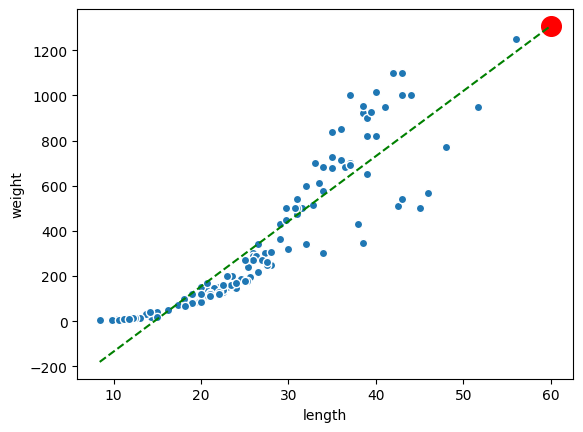

In [20]:
# Plot the regression line on test set (length vs. weight predicted)
import matplotlib.pyplot as plt
plt.scatter(train_X[:,0], train_y, edgecolor='w')
plt.plot([8.4,60],m1.predict([[8.4],[60]]), ls='--', color='green')
plt.scatter(60,m1.predict([[60]]), color='r', marker="o", s=200)

plt.xlabel('length')
plt.ylabel('weight')

## Preprocessing - Featur engineering (creating polinomial terms)

In [21]:
train_poly = np.column_stack([train_X **2, train_X])
test_poly=np.column_stack([test_X**2, test_X])

## Fit model - polynomial regression

Model Equation: m2

$Weight = \beta_2 \times Length^2 + \beta_1 \times Length + \beta_0$

In [22]:
m2 = linear_model.LinearRegression()
m2.fit(train_poly, train_y)


LinearRegression()

In [23]:
print(m2.coef_)
print(m2.intercept_)

[ 0.18293741 18.30657479]
-290.0161707399851


### Evaluate Model Performance: m2

In [24]:
# m2, which added quadratic term of length, turns out to exhibit a superior R^2
print(m2.score(train_poly, train_y))
print(m2.score(test_poly, test_y))

0.8271002311792419
0.8895818263720053


In [25]:
# Get coefficients and intercept for M2
coef_squared = m2.coef_[0]  # coefficient for length²
coef_linear = m2.coef_[1]   # coefficient for length
intercept = m2.intercept_

# Print model equation
print(f"Model Equation M2: Weight = {coef_squared:.2f} × Length² + {coef_linear:.2f} × Length + {intercept:.2f}")


Model Equation M2: Weight = 0.18 × Length² + 18.31 × Length + -290.02


### Plot Test set results : polynomial

In [26]:
np.arange(8.4, 60)

array([ 8.4,  9.4, 10.4, 11.4, 12.4, 13.4, 14.4, 15.4, 16.4, 17.4, 18.4,
       19.4, 20.4, 21.4, 22.4, 23.4, 24.4, 25.4, 26.4, 27.4, 28.4, 29.4,
       30.4, 31.4, 32.4, 33.4, 34.4, 35.4, 36.4, 37.4, 38.4, 39.4, 40.4,
       41.4, 42.4, 43.4, 44.4, 45.4, 46.4, 47.4, 48.4, 49.4, 50.4, 51.4,
       52.4, 53.4, 54.4, 55.4, 56.4, 57.4, 58.4, 59.4])

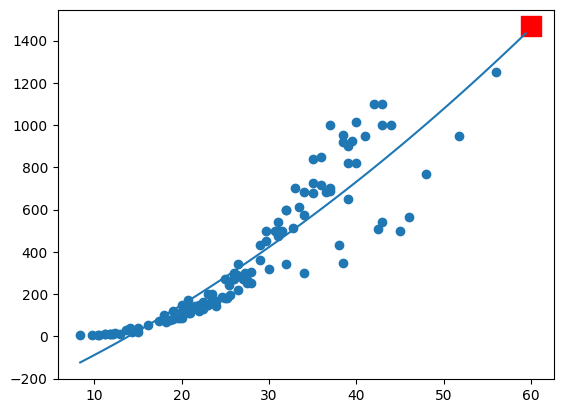

In [27]:
# Plot the regression line on test set (length vs. weight predicted)
plt.scatter(train_X, train_y)
point=np.arange(8.4, 60)
plt.plot(point,0.18*point**2 + 18.36*point-290.97 )
plt.scatter(60,m2.predict([[60**2,60]]), color='r', marker="s", s=200)

In [28]:
# The weight for a fish with the length of 60 inch is now predicted to be 1466.5 lbs.
m2.predict([[60**2, 60]])

array([1466.95300034])



> Check the R^2 for both train and test set



